# ESgamess: molecule and Gamess job handling class (symmetry and transformations demo)
01/12/23, 23/01/24 (debugged)

Demo for using ESgamess class for more advances Gamess jobs, including symmetry and frame transformations.

For an intro demo, see [the basic demo page](ESgamess_class_demo_221123-tidy.html).

## Imports

In [1]:
# Import class
from epsman.elecStructure.gamess import ESgamess

## Create molecule

See [the basic demo page](ESgamess_class_demo_221123-tidy.html) for alternative methods, here just set from SMILES.

Set name = None
Set smiles = O=C=O
Set molFile = None
Set xyz = None
Set molOverride = None
Set job = None
Set sym = C1
Set atomList = None
Set precision = 4
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


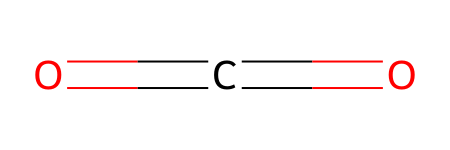

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,-1.2375,0.0,0.0
1,1,C,6,0.0000,0.0,0.0
2,2,O,8,1.2375,0.0,0.0


In [2]:
# Molecule from PubChem
# testDL = ESgamess(searchName = 'CO2')

# Molecule from Smiles
testDL = ESgamess(smiles='O=C=O', precision = 4)

## pyGamess wrapper

### Setup Gamess job

In [3]:
# Init the pyGamess job.
# This minimally needs a gamess_path set, which defaults to '/opt/gamess'
testDL.initGamess() # Using defaults

*** Init pyGamess job.
Default Gamess input card set (use self.params to modify options dictionary, self.setGamess() to test):

 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
None
C1
O      8.0     -1.2375000000    0.0000000000    0.0000000000 
C      6.0      0.0000000000    0.0000000000    0.0000000000 
O      8.0      1.2375000000    0.0000000000    0.0000000000 
 $END

*** Found Gamess executable: /opt/gamess/gamess.00.x


In [4]:
# Run quick energy job to test all working OK
testDL.runGamess()

INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x fdpotu -ddi 1 1 jake -scr /tmp/tmpn3cbn17h > /tmp/tmpn3cbn17h/fdpotu.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -185.05856527930001


In [5]:
testDL.printTable()

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,-1.2375,0.0,0.0
1,1,C,6,0.0000,0.0,0.0
2,2,O,8,1.2375,0.0,0.0


## Symmetry & frame transformations


### Reference frame orientation

To use symmetry in the Gamess calculations, the system must be oriented such that the Z-axis is the highest symmetry axis. In tests both PubChem and RDkit seem to use the X-axis as the symmetry axis, so the frame needs to be rotated in general.

From the [Gamess manual](https://www.msg.chem.iastate.edu/gamess/GAMESS_Manual/docs-input.txt):

```
    The 'master frame' is just a standard orientation for
the molecule.  By default, the 'master frame' assumes that
    1.   z is the principal rotation axis (if any),
    2.   x is a perpendicular two-fold axis (if any),
    3.  xz is the sigma-v plane (if any), and
    4.  xy is the sigma-h plane (if any).
Use the lowest number rule that applies to your molecule.

        Some examples of these rules:
Ammonia (C3v): the unique H lies in the XZ plane (R1,R3).
Ethane (D3d): the unique H lies in the YZ plane (R1,R2).
Methane (Td): the H lies in the XYZ direction (R2).  Since
         there is more than one 3-fold, R1 does not apply.
HP=O (Cs): the mirror plane is the XY plane (R4).

In general, it is a poor idea to try to reorient the
molecule.  Certain sections of the program, such as the
orbital symmetry assignment, do not know how to deal with
cases where the 'master frame' has been changed.

Linear molecules (C4v or D4h) must lie along the z axis,
so do not try to reorient linear molecules.
```

This is set with `self.rotateFrame()`, which can set arbitrary rotations, but defaults to X > Z axis transformation. This uses the RDkit canoicalise and transformation functions, with rotation matrices, as per [Github user iwatobipen's example notebook](https://nbviewer.jupyter.org/github/iwatobipen/playground/blob/master/rotation_mol.ipynb). (Thanks to [iwatobipen](https://github.com/iwatobipen) and the [RDkit list](https://sourceforge.net/p/rdkit/mailman/message/36598250/).)

In [6]:
# Rotate the frame - default should align to Z-axis
testDL.rotateFrame()

*** Updating coords (Pandas version).
*** Set frame rotations, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.2375
1,1,C,6,0.0,0.0,0.0000
2,2,O,8,0.0,0.0,-1.2375


### Set symmetry (point group)

Symmetry groups supported (from the [Gamess manual](https://www.msg.chem.iastate.edu/gamess/GAMESS_Manual/docs-input.txt)):

```
GROUP is the Schoenflies symbol of the symmetry group,
you may choose from
    C1, Cs, Ci, Cn, S2n, Cnh, Cnv, Dn, Dnh, Dnd,
    T, Th, Td, O, Oh.

NAXIS is the order of the highest rotation axis, and
must be given when the name of the group contains an N.
For example, "Cnv 2" is C2v.  "S2n 3" means S6.  Use of
NAXIS up to 8 is supported in each axial groups.

For linear molecules, choose either Cnv or Dnh, and enter
NAXIS as 4.  Enter atoms as Dnh with NAXIS=2.  If the
electronic state of either is degenerate, check the note
about the effect of symmetry in the electronic state
in the SCF section of REFS.DOC.
```

In [7]:
# Set Gamess input with symmetry
testDL.setGamess(note='CO2 sym testing', sym='DNH 8')

Set sym = DNH 8

*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
CO2 sym testing
DNH 8

O      8.0      0.0000000000    0.0000000000    1.2375000000 
C      6.0      0.0000000000    0.0000000000    0.0000000000 
O      8.0      0.0000000000    0.0000000000   -1.2375000000 
 $END



Finally, **symmetrized jobs require only the symmetry unique atoms to be given on the input card.** This is currently accomplished here rather crudely, via a list of atom indices (rows) to the input builder. Note that an incorrect setting here will potentially result in a Gamess run with a wildly incorrect molecular geometry, potentially including additional atoms, depending on the symmetry group applied.

For example...

In [8]:
testDL.setGamess(note='CO2 sym testing', sym='DNH 8', atomList = [0,1])

Set sym = DNH 8
Set atomList = [0, 1]

*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
CO2 sym testing
DNH 8

O      8.0      0.0000000000    0.0000000000    1.2375000000 
C      6.0      0.0000000000    0.0000000000    0.0000000000 
 $END



Where `self.params['extra']['atomList']` gives the sub-selection on which atoms are listed on the input card for symmetrized jobs (TODO: make this better/automated!).

In [9]:
testDL.params['extra']

{'job': 'CO2 sym testing', 'sym': 'DNH 8', 'atomList': [0, 1]}

### Run single-point symmetrized calculation

Once the point group and atom list are set, `self.runGamess` will result in a symmetrized calculation run...

In [10]:
# Run symmetrized calc
testDL.runGamess(fileOut = '/tmp/testCO2.out')

INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x eijdcf -ddi 1 1 jake -scr /tmp/tmpn3cbn17h > /tmp/tmpn3cbn17h/eijdcf.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -185.05856527700001
*** Gamess output file moved to /tmp/testCO2.out


In [11]:
# View full output card for details
testDL.printGamess()

*** Contents from file /tmp/testCO2.out.

 Distributed Data Interface kickoff program.
 Initiating 1 compute processes on 1 nodes to run the following command:
 /opt/gamess/gamess.00.x eijdcf 

          ******************************************************
          *         GAMESS VERSION = 30 SEP 2018 (R3)         *
          *             FROM IOWA STATE UNIVERSITY             *
          * M.W.SCHMIDT, K.K.BALDRIDGE, J.A.BOATZ, S.T.ELBERT, *
          *   M.S.GORDON, J.H.JENSEN, S.KOSEKI, N.MATSUNAGA,   *
          *          K.A.NGUYEN, S.J.SU, T.L.WINDUS,           *
          *       TOGETHER WITH M.DUPUIS, J.A.MONTGOMERY       *
          *         J.COMPUT.CHEM.  14, 1347-1363(1993)        *
          **************** 64 BIT LINUX VERSION ****************

  SINCE 1993, STUDENTS AND POSTDOCS WORKING AT IOWA STATE UNIVERSITY
  AND ALSO IN THEIR VARIOUS JOBS AFTER LEAVING ISU HAVE MADE IMPORTANT
  CONTRIBUTIONS TO THE CODE:
     IVANA ADAMOVIC, CHRISTINE AIKENS, YURI ALEXEEV,

### Geometry optimization (symmetrized)

Running an optimization should now just also work, but there are some potential gotchas in this case.

1. the output atom ordering may change in the symmetrized case, so further use of the results may require changes to `self.params['extra']['atomList']`.

2. It is also of note that Gamess requirements are not enforced automatically here, so some massaging of the input settings may be required - for example the ordering of the atoms on the input card.

In [12]:
# Test geom opt with symmetrization, no changes from previous input
testDL.runGamess(runType='optimize',fileOut = '/tmp/test_CO2_geomOpt.out')

INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x svzrwn -ddi 1 1 jake -scr /tmp/tmpn3cbn17h > /tmp/tmpn3cbn17h/svzrwn.out


*** Warning: found errors in Gamess output, type: Warnings
*** Check self.mol.GetProp('Warnings') for details.
*** Warning: found errors in Gamess output, type: ddikick
*** Check self.mol.GetProp('ddikick') for details.
*** Gamess run completed with warnings.
E = -185.05856527700001

*** Gamess optimization run - reseting self.mol with updated coords.
Note that atom ordering may change depending on Gamess output.
Found 1 geometry iterations in Gamess output.
Updating with new coords, output set to self.mol


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.2375
1,1,O,8,0.0,0.0,1.2375
2,2,C,6,0.0,0.0,0.0000


*** WARNINGS FOUND IN GAMESS OUTPUT, values for E and molecular coords may reflect input molecule if run did not complete.
Set geom opt coord outputs to self.geomOpt.
*** Gamess output file moved to /tmp/test_CO2_geomOpt.out


In this case note that warnings are generated, indicating problems with the Gamess run - possibly due to the input geometry, or other optimization settings.

Note, also, the line "Found 1 geometry iterations in Gamess output", indicating that no geometry optimization iterations were completed (i.e. only the input geometry is present), and updated geometry table. The geometry has now been updated from the Gamess output file, which may have a different ordering to the inputs for the symmetrized case, as noted above, even if the run failed.

#### Troubleshooting Gamess optimization runs

In [13]:
# As noted in the error messages above, the specific Gamess error messages can be investigated
print(testDL.mol.GetProp('Warnings'))
print(testDL.mol.GetProp('ddikick'))

 ddikick.x: application process 0 quit unexpectedly.
 ddikick.x: Sending kill signal to DDI processes.
 ddikick.x: Execution terminated due to error(s).


In [14]:
# These are also set as a full dict of outputs
testDL.mol.errorDict

{'Warnings': {'re': re.compile(r'.*WARNING: .*', re.UNICODE),
  'matches': ' WARNING: EIGENVECTOR ROUTINE -EINVIT- DID NOT CONVERGE FOR VECTOR     4\n WARNING: EIGENVECTOR ROUTINE -EINVIT- DID NOT CONVERGE FOR VECTOR     7',
  'warnFlag': 1},
 'ddikick': {'re': re.compile(r'.*ddikick.x: .*', re.UNICODE),
  'matches': ' ddikick.x: application process 0 quit unexpectedly.\n ddikick.x: Sending kill signal to DDI processes.\n ddikick.x: Execution terminated due to error(s).',
  'warnFlag': 1}}

In [15]:
# For a quick look, checking the end of the file is also useful
testDL.tail()

*** Contents from file /tmp/test_CO2_geomOpt.out.
Showing 20 tail lines.
          MAXIMUM GRADIENT = 0.0992719    RMS GRADIENT = 0.0467972

 NSERCH:   0  E=     -185.0585652770  GRAD. MAX=  0.0992719  R.M.S.=  0.0467972

          FORCE CONSTANT MATRIX NOT UPDATED --- TAKING FIRST STEP
 NORM =  9.12E-04 PERFORMANCE INDEX =  5.48E+01
 A HALT WILL OCCUR IF THE PERF.IND. EXCEEDS 100.0
 NORM =  1.22E-04 PERFORMANCE INDEX =  4.12E+02
 A HALT WILL OCCUR IF THE PERF.IND. EXCEEDS 100.0
 EINVIT HAS FAILED TO CONVERGE FOR VECTOR    7
 GLDIAG FAILURE IN -BKRNR-
 EXECUTION OF GAMESS TERMINATED -ABNORMALLY- AT Tue Jan 23 18:11:35 2024
               580000  WORDS OF DYNAMIC MEMORY USED
 STEP CPU TIME =     0.00 TOTAL CPU TIME =          0.0 (      0.0 MIN)
 TOTAL WALL CLOCK TIME=          0.0 SECONDS, CPU UTILIZATION IS    66.67%
 ddikick.x: application process 0 quit unexpectedly.
 ddikick.x: Sending kill signal to DDI processes.
 ddikick.x: Execution terminated due to error(s).


In [16]:
# Check the header lines... this looks OK, but note the atom ordering.
testDL.head(20)

*** Contents from file /tmp/test_CO2_geomOpt.out.
Showing 20 header lines, starting from line 80.
 EXECUTION OF GAMESS BEGUN Tue Jan 23 18:11:35 2024

            ECHO OF THE FIRST FEW INPUT CARDS -
 INPUT CARD> $contrl scftyp=rhf runtyp=optimize $end                                        
 INPUT CARD> $basis gbasis=sto ngauss=3 $end                                                
 INPUT CARD> $system mwords=30 $end                                                         
 INPUT CARD> $statpt opttol=0.0001 nstep=20 $end                                            
 INPUT CARD> $DATA                                                                          
 INPUT CARD>CO2 sym testing                                                                 
 INPUT CARD>DNH 8                                                                           
 INPUT CARD>                                                                                
 INPUT CARD>O      8.0      0.0000000000    0.0000000000 

In this case, the error is (2) - the atom ordering is not as Gamess prefers. This can be modified as required, including the ordering, again via the `atomList` configuration.

#### Rerunning geom opt with updated parameters

In [17]:
# Check current geom table - note this HAS changed with the symmetrized run geom return from Gamess.
# This may be updated even if the run fails.
testDL.printTable()

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.2375
1,1,O,8,0.0,0.0,1.2375
2,2,C,6,0.0,0.0,0.0000


In [18]:
# Try updating the atom ordering, so that the Z=0 atom is set first, and create a new job with this.
testDL.setGamess(note='CO2 sym testing v2', sym='DNH 8', atomList = [2,1])

# Run geom opt with new parameters
testDL.runGamess(runType='optimize',fileOut = '/tmp/test_CO2_geomOpt_v2.out')

INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x leskvl -ddi 1 1 jake -scr /tmp/tmpn3cbn17h > /tmp/tmpn3cbn17h/leskvl.out


Set sym = DNH 8
Set atomList = [2, 1]

*** Gamess input card:
 $contrl scftyp=rhf runtyp=optimize $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $statpt opttol=0.0001 nstep=20 $end
 $DATA
CO2 sym testing v2
DNH 8

C      6.0      0.0000000000    0.0000000000    0.0000000000 
O      8.0      0.0000000000    0.0000000000    1.2375000000 
 $END

*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -185.0683906077

*** Gamess optimization run - reseting self.mol with updated coords.
Note that atom ordering may change depending on Gamess output.
Found 6 geometry iterations in Gamess output.
Updating with new coords, output set to self.mol


,Ind,Species,Atomic Num.,x,y,z
0,0,C,6,0.0,0.0,0.0000
1,1,O,8,0.0,0.0,-1.1879
2,2,O,8,0.0,0.0,1.1879


Set geom opt coord outputs to self.geomOpt.
*** Gamess output file moved to /tmp/test_CO2_geomOpt_v2.out


Success! In this case the atom ordering needed some massaging for the Gamess input. Note:

- Output E has changed.
- `Found 6 geometry iterations in Gamess output.` in the printed info.
- Updated coords table has different Z values.

In [19]:
# The full set of geometries sampled can be investigated, and are set in self.geomOpt in the default case
testDL.geomOpt

Ind Species  Atomic Num.    x    y       z
Geom iter Atom index                                            
0         0             0       C            6  0.0  0.0  0.0000
          1             1       O            8  0.0  0.0 -1.2375
          2             2       O            8  0.0  0.0  1.2375
1         0             3       C            6  0.0  0.0  0.0000
          1             4       O            8  0.0  0.0 -1.1499
          2             5       O            8  0.0  0.0  1.1499
2         0             6       C            6  0.0  0.0  0.0000
          1             7       O            8  0.0  0.0 -1.1942
          2             8       O            8  0.0  0.0  1.1942
3         0             9       C            6  0.0  0.0  0.0000
          1            10       O            8  0.0  0.0 -1.1887
          2            11       O            8  0.0  0.0  1.1887
4         0            12       C            6  0.0  0.0  0.0000
          1            13       O            8  0.0  0.0 -1.1879
          2            14       O            8  0.0  0.0  1.1879
5         0            15       C            6  0.0  0.0  0.0000
          1            16       O            8  0.0  0.0 -1.1879
          2            17       O            8  0.0  0.0  1.1879

## Versions

In [20]:
import scooby
scooby.Report(additional=['epsman', 'cclib', 'rdkit'])

--------------------------------------------------------------------------------
  Date: Tue Jan 23 18:11:41 2024 EST

                OS : Linux
            CPU(s) : 64
           Machine : x86_64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.7.10 (default, Feb 26 2021, 18:47:35)  [GCC 7.3.0]

            epsman : 0.0.1
             cclib : 1.7
             rdkit : 2023.03.2
             numpy : 1.19.2
             scipy : 1.6.1
           IPython : 7.21.0
        matplotlib : 3.3.4
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

In [21]:
# Check current Git commit for local ePSproc version
from pathlib import Path
import epsman as em

!git -C {Path(em.__file__).parent} branch
!git -C {Path(em.__file__).parent} log --format="%H" -n 1

  master
* restructure160221
29b4057dd2ede80974fd6e17e28c91aaebeae6a5


In [22]:
# Check current remote commits
!git ls-remote --heads https://github.com/phockett/epsman

21b4357a169baf9fa7887c68bd1cf8f92c59642c	refs/heads/master
29b4057dd2ede80974fd6e17e28c91aaebeae6a5	refs/heads/restructure160221
